In [1]:
!pip install -q pyomo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 90.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.5 MB/s eta 0:00:00


In [2]:
from pyomo.environ import *

In [3]:
model=ConcreteModel()

In [4]:
#case1
model.x1 = Var(domain = Reals)
model.x2 = Var(domain = Reals)
model.x3 = Var(domain = Reals)
model.x4 = Var(domain = Reals)
model.x5 = Var(domain = Reals)
model.y  = Var(domain = Reals)

model.constr1 = Constraint(expr = model.x1>=0)
model.constr2 = Constraint(expr = model.x2>= 0)
model.constr3 = Constraint(expr = model.x3>=0)
model.constr4 = Constraint(expr = model.x4>=0)
model.constr5 = Constraint(expr = model.x5>=0)
model.constr6 = Constraint(expr = model.y>=0)
model.constr7 = Constraint(expr = model.y<=2.5)
model.constr8 = Constraint(expr = 1*model.x1 +3*model.x2 +1*model.x3 +7*model.x4+1*model.x5-1*model.y<=100 )
model.constr9 = Constraint(expr = 1*model.x2+2*model.x3+4*model.x4>=60)
model.constr10 = Constraint(expr= -0.8*model.x1+4.8*model.x2-1.8*model.x3+3.8*model.x4+2.2*model.x5<=0)
model.constr11 = Constraint(expr= -1*model.x1+12*model.x2+1*model.x3+3*model.x4-5*model.x5<=0)
model.constr12 = Constraint(expr= model.x1 -model.x2 + model.x3 - model.x4 + model.x5>=0)
model.constr13 = Constraint(expr= model.x1 + model.x2 + model.x3 - model.x5>=0 )

model.cost=Objective(expr= 0.043*model.x1 + 0.027*model.x2 + 0.025*model.x3 + 0.022*model.x4 + 0.045*model.x5 - 0.0275*model.y,sense=minimize)


In [5]:
model.pprint()

6 Var Declarations
    x1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  None :  None : False :  True :  Reals
    x2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  None :  None : False :  True :  Reals
    x3 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  None :  None : False :  True :  Reals
    x4 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  None :  None : False :  True :  Reals
    x5 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  None :  None : False :  True :  Reals
    y : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  None :  None : False :  True :  Reals

1 Objective Declarations
    cost : Size=1, Index=None, Active=True
 

In [6]:
!apt-get install -y -qq glpk-utils

Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 120895 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_5.0-1_amd64.deb ...
Unpacking libglpk40:amd64 (5.0-1) ...
Selecting previously unselected package glpk-utils.
Preparing to unpack .../glpk-utils_5.0-1_amd64.deb ...
Unpacking glpk-utils (5.0-1) ...
Setting up libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4b

In [7]:
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 0.852372448979592
  Upper bound: 0.852372448979592
  Number of objectives: 1
  Number of constraints: 13
  Number of variables: 6
  Number of nonzeros: 35
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.004397869110107422
# ----------------------------------------------------------
#   Solution Information
# ----------

In [8]:
print('\nCost = ', model.cost())
print('\nDecision Variables')
print('x1 = ', model.x1())
print('x2 = ', model.x2())
print('x3 = ', model.x3())
print('x4 = ', model.x4())
print('x5 = ', model.x5())
print('y = ', model.y())

print('\nConstraints')
print('Constraint 1 = ', model.constr1())
print('Constraint 2 = ', model.constr2())
print('Constraint 3 = ', model.constr3())
print('Constraint 4 = ', model.constr4())
print('Constraint 5 = ', model.constr5())
print('Constraint 6 = ', model.constr6())
print('Constraint 7 = ', model.constr7())
print('Constraint 8 = ', model.constr8())
print('Constraint 9 = ', model.constr9())
print('Constraint 10 = ', model.constr10())
print('Constraint 11 = ', model.constr11())
print('Constraint 12 = ', model.constr12())
print('Constraint 13 = ', model.constr13())





Cost =  0.8523724489795922

Decision Variables
x1 =  0.0
x2 =  0.0
x3 =  19.5918367346939
x4 =  5.20408163265306
x5 =  7.04081632653061
y =  2.5

Constraints
Constraint 1 =  0.0
Constraint 2 =  0.0
Constraint 3 =  19.5918367346939
Constraint 4 =  5.20408163265306
Constraint 5 =  7.04081632653061
Constraint 6 =  2.5
Constraint 7 =  2.5
Constraint 8 =  60.56122448979593
Constraint 9 =  60.00000000000004
Constraint 10 =  -4.796163466380676e-14
Constraint 11 =  2.842170943040401e-14
Constraint 12 =  21.42857142857145
Constraint 13 =  12.55102040816329


In [9]:
model1=ConcreteModel()

In [10]:
#case2
model1.x1 = Var(domain = Reals)
model1.x2 = Var(domain = Reals)
model1.x3 = Var(domain = Reals)
model1.x4 = Var(domain = Reals)
model1.x5 = Var(domain = Reals)
model1.y  = Var(domain = Reals)

model1.constr1 = Constraint(expr = model1.x1>=0)
model1.constr2 = Constraint(expr = model1.x2>= 0)
model1.constr3 = Constraint(expr = model1.x3>=0)
model1.constr4 = Constraint(expr = model1.x4>=0)
model1.constr5 = Constraint(expr = model1.x5>=0)
model1.constr6 = Constraint(expr = model1.y>=0)
model1.constr7 = Constraint(expr = model1.y<=2.5)
model1.constr8 = Constraint(expr = 1*model1.x1 +3*model1.x2 +1*model1.x3 +7*model1.x4+1*model1.x5-1*model1.y<=100 )
model1.constr9 = Constraint(expr = 1*model1.x2+2*model1.x3+4*model1.x4>=60)
model1.constr10 = Constraint(expr= 0.8*model1.x1+4.8*model1.x2-1.8*model1.x3+3.8*model1.x4+2.2*model1.x5<=0)
model1.constr11 = Constraint(expr= -1*model1.x1+12*model1.x2+1*model1.x3+3*model1.x4-5*model1.x5>=0)
model1.constr12 = Constraint(expr= model1.x1 -model1.x2 + model1.x3 - model1.x4 + model1.x5>=0)
model1.constr13 = Constraint(expr= model1.x1 + model1.x2 + model1.x3 - model1.x5<=0 )

model1.cost=Objective(expr= 0.043*model1.x1 + 0.027*model1.x2 + 0.025*model1.x3 + 0.022*model1.x4 + 0.045*model1.x5 - 0.0275*model1.y,sense=minimize)


In [11]:
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model1).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 13
  Number of variables: 6
  Number of nonzeros: 35
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: other
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.008123397827148438


In [12]:
#case3
model2=ConcreteModel()
model2.x1 = Var(domain = Reals)
model2.x2 = Var(domain = Reals)
model2.x3 = Var(domain = Reals)
model2.x4 = Var(domain = Reals)
model2.x5 = Var(domain = Reals)
model2.y  = Var(domain = Reals)

model2.constr1 = Constraint(expr = model2.x1>=0)
model2.constr2 = Constraint(expr = model2.x2>= 0)
model2.constr3 = Constraint(expr = model2.x3>=0)
model2.constr4 = Constraint(expr = model2.x4>=0)
model2.constr5 = Constraint(expr = model2.x5>=0)
model2.constr6 = Constraint(expr = model2.y>=0)
model2.constr7 = Constraint(expr = model2.y<=2.5)
model2.constr8 = Constraint(expr = 1*model2.x1 +3*model2.x2 +1*model2.x3 +7*model2.x4+1*model2.x5-1*model2.y<=100 )
model2.constr9 = Constraint(expr = 1*model2.x2+2*model2.x3+4*model2.x4>=60)
model2.constr10 = Constraint(expr= 0.8*model2.x1+4.8*model2.x2-1.8*model2.x3+3.8*model2.x4+2.2*model2.x5>=0)
model2.constr11 = Constraint(expr= -1*model2.x1+12*model2.x2+1*model2.x3+3*model2.x4-5*model2.x5<=0)
model2.constr12 = Constraint(expr= model2.x1 -model2.x2 + model2.x3 - model2.x4 + model2.x5<=0)
model2.constr13 = Constraint(expr= model2.x1 + model2.x2 + model2.x3 - model2.x5>=0 )

model2.cost=Objective(expr= 0.043*model2.x1 + 0.027*model2.x2 + 0.025*model2.x3 + 0.022*model2.x4 + 0.045*model2.x5 - 0.0275*model2.y,sense=minimize)


In [13]:
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model2).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 13
  Number of variables: 6
  Number of nonzeros: 35
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: other
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.00810861587524414


In [14]:
#case4
model3=ConcreteModel()
model3.x1 = Var(domain = Reals)
model3.x2 = Var(domain = Reals)
model3.x3 = Var(domain = Reals)
model3.x4 = Var(domain = Reals)
model3.x5 = Var(domain = Reals)
model3.y  = Var(domain = Reals)

model3.constr1 = Constraint(expr = model3.x1>=0)
model3.constr2 = Constraint(expr = model3.x2>= 0)
model3.constr3 = Constraint(expr = model3.x3>=0)
model3.constr4 = Constraint(expr = model3.x4>=0)
model3.constr5 = Constraint(expr = model3.x5>=0)
model3.constr6 = Constraint(expr = model3.y>=0)
model3.constr7 = Constraint(expr = model3.y<=2.5)
model3.constr8 = Constraint(expr = 1*model3.x1 +3*model3.x2 +1*model3.x3 +7*model3.x4+1*model3.x5-1*model3.y<=100 )
model3.constr9 = Constraint(expr = 1*model3.x2+2*model3.x3+4*model3.x4>=60)
model3.constr10 = Constraint(expr= 0.8*model3.x1+4.8*model3.x2-1.8*model3.x3+3.8*model3.x4+2.2*model3.x5>=0)
model3.constr11 = Constraint(expr= -1*model3.x1+12*model3.x2+1*model3.x3+3*model3.x4-5*model3.x5>=0)
model3.constr12 = Constraint(expr= model3.x1 -model3.x2 + model3.x3 - model3.x4 + model3.x5<=0)
model3.constr13 = Constraint(expr= model3.x1 + model3.x2 + model3.x3 - model3.x5<=0 )

model3.cost=Objective(expr= 0.043*model3.x1 + 0.027*model3.x2 + 0.025*model3.x3 + 0.022*model3.x4 + 0.045*model3.x5 - 0.0275*model3.y,sense=minimize)


In [15]:
model3.pprint()

6 Var Declarations
    x1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  None :  None : False :  True :  Reals
    x2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  None :  None : False :  True :  Reals
    x3 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  None :  None : False :  True :  Reals
    x4 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  None :  None : False :  True :  Reals
    x5 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  None :  None : False :  True :  Reals
    y : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  None :  None : False :  True :  Reals

1 Objective Declarations
    cost : Size=1, Index=None, Active=True
 

In [16]:
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model3).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 0.359583333333333
  Upper bound: 0.359583333333333
  Number of objectives: 1
  Number of constraints: 13
  Number of variables: 6
  Number of nonzeros: 35
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.022175073623657227
# ----------------------------------------------------------
#   Solution Information
# ----------

In [17]:
print('\nCost = ', model3.cost())
print('\nDecision Variables')
print('x1 = ', model3.x1())
print('x2 = ', model3.x2())
print('x3 = ', model3.x3())
print('x4 = ', model3.x4())
print('x5 = ', model3.x5())
print('y = ', model3.y())

print('\nConstraints')
print('Constraint 1 = ', model3.constr1())
print('Constraint 2 = ', model3.constr2())
print('Constraint 3 = ', model3.constr3())
print('Constraint 4 = ', model3.constr4())
print('Constraint 5 = ', model3.constr5())
print('Constraint 6 = ', model3.constr6())
print('Constraint 7 = ', model3.constr7())
print('Constraint 8 = ', model3.constr8())
print('Constraint 9 = ', model3.constr9())
print('Constraint 10 = ', model3.constr10())
print('Constraint 11 = ', model3.constr11())
print('Constraint 12 = ', model3.constr12())
print('Constraint 13 = ', model3.constr13())


Cost =  0.3595833333333338

Decision Variables
x1 =  0.0
x2 =  0.0
x3 =  1.66666666666667
x4 =  14.1666666666667
x5 =  1.66666666666666
y =  2.5

Constraints
Constraint 1 =  0.0
Constraint 2 =  0.0
Constraint 3 =  1.66666666666667
Constraint 4 =  14.1666666666667
Constraint 5 =  1.66666666666666
Constraint 6 =  2.5
Constraint 7 =  2.5
Constraint 8 =  100.00000000000023
Constraint 9 =  60.00000000000014
Constraint 10 =  54.5000000000001
Constraint 11 =  35.83333333333347
Constraint 12 =  -10.83333333333337
Constraint 13 =  9.992007221626409e-15


In [18]:
#Question 2
#For Decentralised System
model4=ConcreteModel()
model4.x1 = Var(domain = PositiveReals)
model4.x2 = Var(domain = PositiveReals)
model4.y1 = Var(domain = PositiveReals)
model4.y2 = Var(domain = PositiveReals)


model4.constr1=Constraint(expr = model4.x1+model4.x2<=60)
model4.constr2=Constraint(expr = model4.y1+model4.y2<=60)
model4.constr3=Constraint(expr = 4*model4.x1+2*model4.x2<=80)
model4.constr4=Constraint(expr = 2*model4.x1+5*model4.x2<=60)
model4.constr5=Constraint(expr = 5*model4.y1+3*model4.y2<=60)
model4.constr6=Constraint(expr = 5*model4.y1+6*model4.y2<=75)

model4.cost=Objective(expr = 10*model4.x1+15*model4.x2+10*model4.y1+15*model4.y2,sense=maximize)

In [19]:
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model4).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 437.5
  Upper bound: 437.5
  Number of objectives: 1
  Number of constraints: 6
  Number of variables: 4
  Number of nonzeros: 12
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.01659107208251953
# ----------------------------------------------------------
#   Solution Information
# ------------------------------------

In [20]:
print('\nCost = ', model4.cost())
print('\nDecision Variables')
print('x1 = ', model4.x1())
print('x2 = ', model4.x2())
print('y1 = ', model4.y1())
print('y2 = ', model4.y2())


print('\nConstraints')
print('Constraint 1 = ', model4.constr1())
print('Constraint 2 = ', model4.constr2())
print('Constraint 3 = ', model4.constr3())
print('Constraint 4 = ', model4.constr4())
print('Constraint 5 = ', model4.constr5())
print('Constraint 6 = ', model4.constr6())



Cost =  437.5

Decision Variables
x1 =  17.5
x2 =  5.0
y1 =  0.0
y2 =  12.5

Constraints
Constraint 1 =  22.5
Constraint 2 =  12.5
Constraint 3 =  80.0
Constraint 4 =  60.0
Constraint 5 =  37.5
Constraint 6 =  75.0


In [21]:
#For Centralised System
model5=ConcreteModel()
model5.x1 = Var(domain = PositiveReals)
model5.x2 = Var(domain = PositiveReals)
model5.y1 = Var(domain = PositiveReals)
model5.y2 = Var(domain = PositiveReals)


model5.constr1=Constraint(expr = model5.x1+model5.x2+model5.y1+model5.y2<=120)
model5.constr2=Constraint(expr = 4*model5.x1+2*model5.x2<=80)
model5.constr3=Constraint(expr = 2*model5.x1+5*model5.x2<=60)
model5.constr4=Constraint(expr = 5*model5.y1+3*model5.y2<=60)
model5.constr5=Constraint(expr = 5*model5.y1+6*model5.y2<=75)

model5.cost=Objective(expr = 10*model5.x1+15*model5.x2+10*model5.y1+15*model5.y2,sense=maximize)

In [22]:
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model5).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 437.5
  Upper bound: 437.5
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 4
  Number of nonzeros: 12
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.01625204086303711
# ----------------------------------------------------------
#   Solution Information
# ------------------------------------

In [23]:
print('\nCost = ', model4.cost())
print('\nDecision Variables')
print('x1 = ', model4.x1())
print('x2 = ', model4.x2())
print('y1 = ', model4.y1())
print('y2 = ', model4.y2())


print('\nConstraints')
print('Constraint 1 = ', model4.constr1())
print('Constraint 2 = ', model4.constr2())
print('Constraint 3 = ', model4.constr3())
print('Constraint 4 = ', model4.constr4())
print('Constraint 5 = ', model4.constr5())




Cost =  437.5

Decision Variables
x1 =  17.5
x2 =  5.0
y1 =  0.0
y2 =  12.5

Constraints
Constraint 1 =  22.5
Constraint 2 =  12.5
Constraint 3 =  80.0
Constraint 4 =  60.0
Constraint 5 =  37.5


In [37]:
#Best Allocation
profit=[]


import numpy as np
for i in range(101):
  r=np.linspace(0,1,101)

  model6=ConcreteModel()
  model6.x1 = Var(domain = PositiveReals)
  model6.x2 = Var(domain = PositiveReals)
  model6.y1 = Var(domain = PositiveReals)
  model6.y2 = Var(domain = PositiveReals)
  model6.constr1=Constraint(expr = 1*model6.x1+1*model6.x2-120*r[i]<=0)
  model6.constr2=Constraint(expr = 1*model6.y1+1*model6.y2+120*r[i]<=120)
  model6.constr3=Constraint(expr = 4*model6.x1+2*model6.x2<=80)
  model6.constr4=Constraint(expr = 2*model6.x1+5*model6.x2<=60)
  model6.constr5=Constraint(expr = 5*model6.y1+3*model6.y2<=60)
  model6.constr6=Constraint(expr = 5*model6.y1+6*model6.y2<=75)

  model6.cost=Objective(expr = 10*model6.x1+15*model6.x2+10*model6.y1+15*model6.y2,sense=maximize)
  SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model6).write()
  profit.append(model6.cost())




# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 187.5
  Upper bound: 187.5
  Number of objectives: 1
  Number of constraints: 6
  Number of variables: 4
  Number of nonzeros: 12
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.004573345184326172
# ----------------------------------------------------------
#   Solution Information
# -----------------------------------

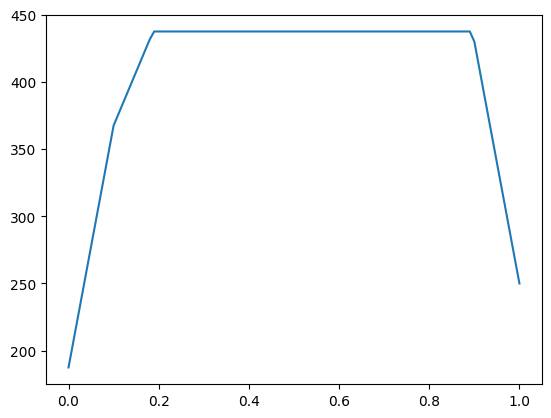

In [38]:
import matplotlib.pyplot as plt
plt.plot(r,profit)
plt.show()

In [44]:
# Dual of Best Allocation

model7=ConcreteModel()
model7.s1 = Var(domain = PositiveReals)
model7.s2 = Var(domain = PositiveReals)
model7.s3 = Var(domain = PositiveReals)

model7.constr1=Constraint(expr = model7.s1+4*model7.s2+2*model7.s3 >= 10)
model7.constr2=Constraint(expr = model7.s1+2*model7.s2+5*model7.s3 >= 15)
model7.cost=Objective(expr = 60*model7.s1+80*model7.s2+60*model7.s3,sense=minimize)
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model7).write()



# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 250.0
  Upper bound: 250.0
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 3
  Number of nonzeros: 6
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.012150049209594727
# ----------------------------------------------------------
#   Solution Information
# ------------------------------------

In [45]:
print('\nCost = ', model7.cost())
print('\nDecision Variables')
print('s1 = ', model7.s1())
print('s2 = ', model7.s2())
print('s3 = ', model7.s3())
print('\nConstraints')
print('Constraint 1 = ', model7.constr1())
print('Constraint 2 = ', model7.constr2())




Cost =  250.0

Decision Variables
s1 =  0.0
s2 =  1.25
s3 =  2.5

Constraints
Constraint 1 =  10.0
Constraint 2 =  15.0
